#data load from drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
  cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
pwd


'/content/drive/MyDrive'

#import data

In [12]:
import pandas as pd
dataset = pd.read_csv('audi.csv')

In [13]:
dataset.keys()

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [14]:
dataset.shape

(10668, 9)

In [7]:
dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [9]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [10]:
dataset['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [11]:
dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


#pairplot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


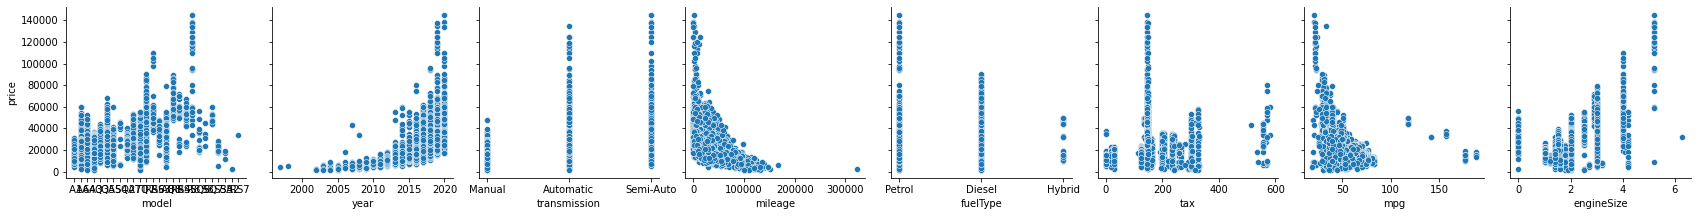

In [16]:
import seaborn as sns
sns.pairplot(dataset, x_vars=['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'], y_vars=['price'], size=3
)

#preprocessing


In [17]:
#mapping categorical column
trans_mapping = {'Manual':1, 'Automatic':2, 'Semi-Auto':3}
dataset['transmission'] = dataset['transmission'].map(trans_mapping)

In [18]:
#converting fuelType column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dataset['fuelType'] = lb_make.fit_transform(dataset['fuelType']) 

In [19]:
#converting model column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dataset['model'] = lb_make.fit_transform(dataset['model']) 

#feature engineering - co relation


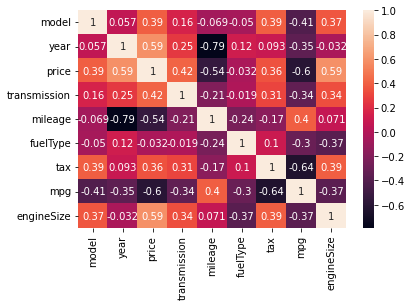

In [20]:
#feature engineering
corr = dataset[dataset.columns].corr()
sns.heatmap(corr, annot=True)

#scaling using minmaxscaler

In [21]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(dataset[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']])
scaled_df = scaler.transform(dataset[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']])

scaled_df = pd.DataFrame(scaled_df, columns=['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'])


#scaling using standardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']])
df = scaler.transform(dataset[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']])

scaled_dfm = pd.DataFrame(df, columns=['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'])

In [23]:
scaled_dfm.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,-1.123544,-0.046450,-0.887521,-1.077089,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,-0.160831,-0.507834,-0.546058,0.084730,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-1.123544,-0.507834,-1.015570,-1.077089,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,-0.545916,-0.046450,-0.520448,0.084730,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.738459,0.876318,-0.477766,-1.077089,-0.971285,1.050783,0.282706,-0.090355,-1.543647


In [ ]:
scaled_dfm.describe()

In [24]:
scaled_df.shape

(10668, 9)

In [25]:
scaled_dfm.shape

(10668, 9)

#pca

In [26]:
#imports
from sklearn.decomposition import PCA

In [27]:
#training data
pca = PCA(n_components=1)
pca.fit(scaled_dfm)
x_pca = pca.transform(scaled_dfm)

In [29]:
scaled_dfm.shape

(10668, 9)

In [ ]:
scaled_df

In [ ]:
x_pca

In [32]:
x_pca.shape


(10668, 1)

Text(0, 0.5, 'PC2')

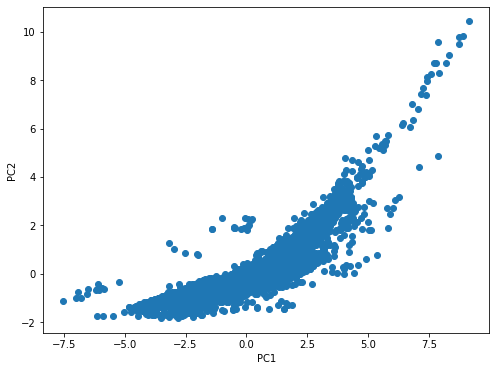

In [35]:
#plot pca
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,:], scaled_dfm['price'])
plt.xlabel('PC1')
plt.ylabel('PC2')


#Linear regression

In [ ]:
#imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
#input data without scaling and pca 
#Residual sum square error Train Set: 89862018.53648
#Residual sum square error TEst Set: 87123048.97652

X = dataset[['year']].values
y = dataset['price'].values

In [ ]:
#input data after scaling
#Residual sum square error Train Set: 0.00436
#Residual sum square error TEst Set: 0.00423

X = scaled_dfm[['year']].values
y = scaled_dfm['price'].values

In [ ]:
#input data after scaling and pca
#Residual sum square error Train Set: 0.00517
#Residual sum square error TEst Set: 0.00510

X = x_pca[::]
y = scaled_dfm[['price']]


In [ ]:
y.shape

In [ ]:
#splitting data for train & test
X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.30, random_state=0)

In [ ]:
#training data
model = LinearRegression().fit(X_train, y_train)

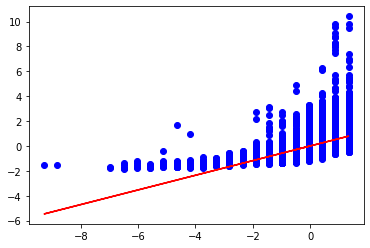

In [ ]:
#plotting the linear regression model
plt.scatter(X, y, c='blue')
plt.plot(X, model.predict(X), color='red')
plt.show()

In [ ]:
#train and test error rate
print('Residual sum square error Train Set: %.5f' % np.mean((model.predict(X_train) - y_train)**2))
print('Residual sum square error TEst Set: %.5f' % np.mean((model.predict(X_test) - y_test)**2))

Residual sum square error Train Set: 0.65485
Residual sum square error TEst Set: 0.63489


#polynomial regression

In [ ]:
#imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#scaled data
X = scaled_dfm[['year']].values
y = scaled_dfm['price'].values

In [ ]:
X = x_pca[::]
y = scaled_dfm[['price']]

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.30, random_state=0)

In [ ]:
#train & transform data
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X_train)
#linear R model
model = LinearRegression() 
model.fit(X_poly, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

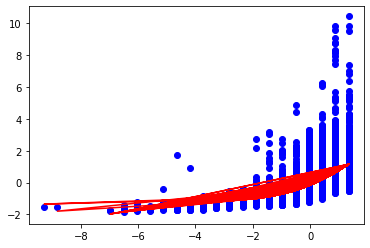

In [ ]:
#plotting the data
plt.scatter(X, y, c='blue')
plt.plot(X, model.predict(poly.fit_transform(X)), color = 'red') 
plt.show()

In [ ]:
#test set transform
poly = PolynomialFeatures(3)
X_poly_test = poly.fit_transform(X_test)

In [ ]:
#train error
print('Residual sum square error Train Set for poly reg: %.5f' % np.mean((model.predict(X_poly) - y_train)**2))

Residual sum square error Train Set for poly reg: 0.60483


In [ ]:
#test error
print('Residual sum square error Test Set for poly reg: %.5f' % np.mean((model.predict(X_poly_test) - y_test)**2))

Residual sum square error Test Set for poly reg: 0.58629


#dropdown widget





In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
def feature(x):
  X = scaled_dfm[['year']].values
  y = scaled_dfm['price'].values

  #split
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.30, random_state=0)
  
  poly = PolynomialFeatures(x)
  X_poly = poly.fit_transform(X_train)

  model = LinearRegression() 
  model.fit(X_poly, y_train)

  #test set transform
  poly = PolynomialFeatures(x)
  X_poly_test = poly.fit_transform(X_test)

  #plot
  plt.scatter(X, y, c='blue')
  plt.plot(X, model.predict(poly.fit_transform(X)), color = 'red') 
  plt.show()
  #train error
  print('Residual sum square error Train Set for poly reg: %.5f' % np.mean((model.predict(X_poly) - y_train)**2)) 
  #test error
  print('Residual sum square error Test Set for poly reg: %.5f' % np.mean((model.predict(X_poly_test) - y_test)**2))


In [ ]:
from ipywidgets import interact
i = interact(feature, x=(0,10))


interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…